**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job! The project is accepted. Keep up the good work on the next sprint!

# Project description
You work for the OilyGiant mining company. Your task is to find the best place for a new well.

Steps to choose the location:

* Collect the oil well parameters in the selected region: oil quality and volume of reserves;
* Build a model for predicting the volume of reserves in the new wells;
* Pick the oil wells with the highest estimated values;
* Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.


## Data description
Geological exploration data for the three regions are stored in files:

* `geo_data_0.csv`. 
* `geo_data_1.csv`. 
* `geo_data_2.csv`. 
* *id* — unique oil well identifier
* *f0, f1, f2* — three features of points (their specific meaning is unimportant, but the features themselves are significant)
* *product* — volume of reserves in the oil well (thousand barrels).

### Conditions:

* Only linear regression is suitable for model training (the rest are not sufficiently predictable).
* When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
* The budget for development of 200 oil wells is 100 USD million.
* One barrel of raw materials brings 4.5 USD of revenue. The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
* After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%.  From the ones that fit the criteria, the region with the highest average profit should be selected.

The data is synthetic: contract details and well characteristics are not disclosed.


## Project instructions

### Download and prepare the data. Explain the procedure.

In [1]:
! pip install sidetable

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 1.5 MB/s eta 0:00:01


#### Imports

In [2]:
import pandas as pd
import numpy as np
import sidetable as stb
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
geo_data = []

for i in range(3):    
    geo_data.append(pd.read_csv('/datasets/geo_data_{}.csv'.format(i)))


#### Data samples

In [4]:
for data in geo_data:
    display(data.head(1))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.22117,105.280062


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276,-0.005876,3.179103


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673


First look into the data.

#### Data Infos

In [5]:
for data in geo_data:
    display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

The data types looks OK.

#### Data description

In [6]:
for data in geo_data:
    display(data.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Descriptive statistics looks good.

#### Missing values

In [7]:
for data in geo_data:
    display(data.stb.missing(style=True))

,missing,total,percent
id,0,"100,000",0.00%
f0,0,"100,000",0.00%
f1,0,"100,000",0.00%
f2,0,"100,000",0.00%
product,0,"100,000",0.00%


,missing,total,percent
id,0,"100,000",0.00%
f0,0,"100,000",0.00%
f1,0,"100,000",0.00%
f2,0,"100,000",0.00%
product,0,"100,000",0.00%


,missing,total,percent
id,0,"100,000",0.00%
f0,0,"100,000",0.00%
f1,0,"100,000",0.00%
f2,0,"100,000",0.00%
product,0,"100,000",0.00%


No missing values.

#### Duplicates

Checkig duplicates for rows:

In [8]:
for data in geo_data:
    display(data.duplicated().sum())

0

0

0

No duplicated rows.

Cheking duplicates for IDs:

In [9]:
for i in range(3):
    display("geo_data_{} duplicated IDs: {:.3%}".format(i, geo_data[i].id.duplicated().sum() / len(geo_data[i]) * 100))
    

'geo_data_0 duplicated IDs: 1.000%'

'geo_data_1 duplicated IDs: 0.400%'

'geo_data_2 duplicated IDs: 0.400%'

Maybe there were points which smapled more than once. Thus, We won't drop them.

#### Dropping unnecessary columns

In [10]:
new_geo_data = []

for data in geo_data:
    new_geo_data.append(data.drop(['id'], axis = 1))

In [11]:
for data in new_geo_data:
    display(data.head(1))

,f0,f1,f2,product
0,0.705745,-0.497823,1.22117,105.280062


,f0,f1,f2,product
0,-15.001348,-8.276,-0.005876,3.179103


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673


We dropped unnecessary column (id, which is non-numeric).

#### Conclusion
In this section, we:
* imported the required libraries.
* looked into the data.
* checked the infos.
* checked the descriptive statistics.
* checked for missing values.
* checked for duplicates.
* dropped unnecessary column (id).

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
The data was loaded and inspected!
	  
</div>

### Train and test the model for each region:
#### Split the data into a training set and validation set at a ratio of 75:25.

In [12]:
features_targets = []

for i in range(3):
    features = new_geo_data[i].drop('product', axis=1)
    target = new_geo_data[i]['product']
    
    features_targets.append({
        'features' : features,
        'target' : target
    })


Targets & features were split.

In [13]:
features_targets_train_valid = []

for data in features_targets:
    features_train, features_valid, target_train, target_valid = train_test_split(data['features'], data['target'], test_size=0.25, random_state=12345)
    features_targets_train_valid.append({
        'features_train' : features_train, 
        'features_valid' : features_valid, 
        'target_train' : target_train, 
        'target_valid' : target_valid
    })

for i in range(3):
    features_train_ratio = len(features_targets_train_valid[i]['features_train'])/len(geo_data[i])
    features_valid_ratio = len(features_targets_train_valid[i]['features_valid'])/len(geo_data[i])
    target_train_ratio = len(features_targets_train_valid[i]['target_train'])/len(geo_data[i]) 
    target_valid_ratio = len(features_targets_train_valid[i]['target_valid'])/len(geo_data[i])
    display('geo_data_{}:'.format(i))
    display('Features train-Validation ratio: {} : {}'.format(features_train_ratio, features_valid_ratio))
    display('Target train-Validation ratio: {} : {}'.format(target_train_ratio, target_valid_ratio))
    print()

'geo_data_0:'

'Features train-Validation ratio: 0.75 : 0.25'

'Target train-Validation ratio: 0.75 : 0.25'

'geo_data_1:'

'Features train-Validation ratio: 0.75 : 0.25'

'Target train-Validation ratio: 0.75 : 0.25'

'geo_data_2:'

'Features train-Validation ratio: 0.75 : 0.25'

'Target train-Validation ratio: 0.75 : 0.25'

Train & valid sets were split correctly.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
The data for each region was split into train and validation
	  
</div>

#### Features scaling

In [14]:
for data in features_targets_train_valid:
    scaler = StandardScaler()
    scaler.fit(data['features_train'])
    data['features_train'] = scaler.transform(data['features_train'])
    data['features_valid'] = scaler.transform(data['features_valid'])

for data in features_targets_train_valid:
    display(data['features_train'][0])
    display(data['features_valid'][0])

array([-0.5448279 ,  1.39026372, -0.09495893])

array([ 0.51791717, -0.61009708, -0.1262255 ])

array([-0.85085526,  0.62442838,  0.29694289])

array([-0.16861596,  0.57137209,  0.29747121])

array([-0.52615957,  0.77632883, -0.40079292])

array([-0.8367172 , -2.22743862, -0.07848897])

Features were scaled correctly.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Scaling was applied correctly
	  
</div>

#### Train the model and make predictions for the validation set. Save the predictions and correct answers for the validation set.


In [81]:
predictions_targets_valid = []

for data in features_targets_train_valid:
    model = LinearRegression() 
    model.fit(data['features_train'], data['target_train'])
    predicted_valid = model.predict(data['features_valid'])
    predict_target_valid = pd.concat([pd.Series(predicted_valid), data['target_valid'].reset_index(drop=True)], axis=1)
    predict_target_valid.columns = ['predicted', 'target']
    predictions_targets_valid.append(predict_target_valid)

OK. We trained a linear reagression model and made predictions.

#### Print the average volume of predicted reserves and model RMSE.

In [82]:
for i in range(3):
    display('geo_data_{} mean: {}'.format(i, round(predictions_targets_valid[i]['predicted'].mean(), 2)))
    display('geo_data_{} RMSE: {}'.format(i, round(math.sqrt(mean_squared_error(predictions_targets_valid[i]['target'], predictions_targets_valid[i]['predicted'])), 2)))    
    print()

'geo_data_0 mean: 92.59'

'geo_data_0 RMSE: 37.58'

'geo_data_1 mean: 68.73'

'geo_data_1 RMSE: 0.89'

'geo_data_2 mean: 94.97'

'geo_data_2 RMSE: 40.03'

#### Analyze the results.

geo_data_1 has the best minimal RMSE score, but the lowest profit mean. 

In addition, geo_data_2 has the best profit mean, but high RMSE score. 

geo_data_0 profit mean and RMSE score are very close to those of geo_data_2.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
The models were trained and evaluated correctly
    
	  
</div>

## Prepare for profit calculation:

#### Store all key values for calculations in separate variables.

In [83]:
unit_revenue = 4500
well_cost_200 = 100000000
one_well_cost = well_cost_200 / 200

#### Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region. Provide the findings about the preparation for profit calculation step.

In [84]:
sufficient_reserves = one_well_cost / unit_revenue
print('The volume of reserves sufficient for developing a new well without losses:', round(sufficient_reserves, 2))

The volume of reserves sufficient for developing a new well without losses: 111.11


As we calculated above, the average volume of reserves in each region are: 92.59, 68.73, 94.97 (respectively). So our volume of reserves means are not sufficient for profit.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Yep, that's right!
	  
</div>

### Write a function to calculate profit from a set of selected oil wells and model predictions:
* Pick the wells with the highest values of predictions. 
* Summarize the target volume of reserves in accordance with these predictions. 
* Provide findings: suggest a region for oil wells' development and justify the choice. 
* Calculate the profit for the obtained volume of reserves.

In [85]:
def reserves_profit(predictions, targets):
    high_predictions = predictions.sort_values(ascending=False)[:200]
    targets_high_predictions = targets.iloc[high_predictions.index]
    reserves_volume = round(targets_high_predictions.sum(), 2)
    predicted_profit = round(reserves_volume * unit_revenue - well_cost_200, 2)
    return reserves_volume, predicted_profit

for i in range(3):
    reserves_volume, predicted_profit = reserves_profit(predictions_targets_valid[i]['predicted'], predictions_targets_valid[i]['target'])
    display('Geo_data_{} - reserves volume: {}, predictions profit: {}'.format(i, reserves_volume, predicted_profit))



'Geo_data_0 - reserves volume: 29601.84, predictions profit: 33208280.0'

'Geo_data_1 - reserves volume: 27589.08, predictions profit: 24150860.0'

'Geo_data_2 - reserves volume: 28245.22, predictions profit: 27103490.0'

According to the findings, the best region for oil wells' development is Geo_data_0 which has the highest reserves volume and thus the highest predicted profit.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Profit calculation function is correct
	  
</div>

### Calculate risks and profit for each region:
#### Use the bootstrapping technique with 1000 samples to find the distribution of profit.

In [103]:
state = np.random.RandomState(12345)

profits = []

for i in range(3):
    values = []
    for j in range(1000):
        target_subsample = predictions_targets_valid[i]['target'].sample(n=500, replace=True, random_state=state)
        predict_subsample = predictions_targets_valid[i]['predicted'][target_subsample.index]
        target_subsample.reset_index(inplace=True, drop=True)
        predict_subsample.reset_index(inplace=True, drop=True)
        reserves, profit = reserves_profit(predict_subsample, target_subsample)
        values.append(profit)
    
    profits.append(pd.Series(values))

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Bootstrapping looks good
	  
</div>

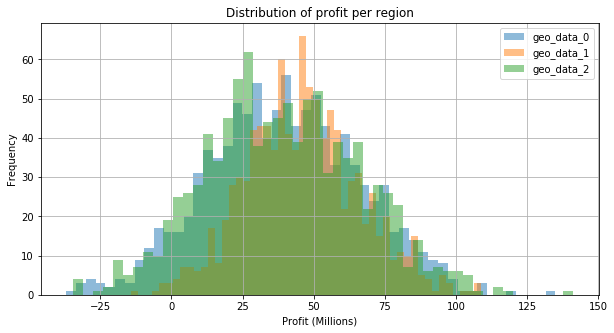

In [113]:
for i in range(3):
    (profits[i]/100000).hist(bins=50, figsize=(10, 5), label='geo_data_{}'.format(i), alpha=0.5)
    plt.legend()
    plt.title('Distribution of profit per region')
    plt.xlabel('Profit (Millions)')
    plt.ylabel('Frequency')


We can see the profits distribution of each region, but we in order to decide which region has the best profit we need to do more calculations.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Nice visualization of profit distribution for each region!
	  
</div>

#### Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage. Provide findings: suggest a region for development of oil wells and justify the choice.

In [109]:
for i in range(3):
    display('geo_data_{}:'.format(i))
    display('Mean: {}'.format(profits[i].mean().round(2)))
    lower = profits[i].quantile(0.025).round(2)
    upper = profits[i].quantile(0.975).round(2)
    display('95% Confidence Interval: ({}, {})'.format(lower, upper))
    losses_risk = profits[i][profits[i] < 0].count() / 1000
    display('Risk of losses: {:.2%}'.format(losses_risk))
    print()

'geo_data_0:'

'Mean: 3961648.88'

'95% Confidence Interval: (-1112147.88, 9097681.62)'

'Risk of losses: 6.90%'

'geo_data_1:'

'Mean: 4611558.0'

'95% Confidence Interval: (780515.0, 8629505.0)'

'Risk of losses: 0.70%'

'geo_data_2:'

'Mean: 3929505.11'

'95% Confidence Interval: (-1122267.25, 9345615.87)'

'Risk of losses: 6.50%'

We suggest to choose geo_data_1 as a region for development of oil wells. It has the highest profits mean and the lowest risk of losses. In addition, it is the only region with all positive values in 95% Confidence Interval.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Mean profit, 95% confidence interval and risk of losses were calculated correctly. The choice of the region is justified
	  
</div>

## Project evaluation
We’ve put together the evaluation criteria for the project. Read this carefully before moving on to the task.
Here’s what the reviewers will look at when reviewing your project:

    How did you prepare the data for training?
    Have you followed all the steps of the instructions?
    Have you taken into account all the business conditions?
    What are your findings about the task study?
    Have you applied the Bootstrapping technique correctly?
    Have you suggested the best region for well development? Is the choice justified?
    Did you avoid code duplication?
    Have you kept to the project structure and kept the code neat?

You have your takeaway sheets and chapter summaries, so you are ready to proceed to the project.
Good luck!